# Caricamento del dataset

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
# Percorso al file CSV
file_path = '../datasets/videogames_sales2016.csv'

# Caricamento del datasets
df = pd.read_csv(file_path)

# Mostra l'intero datasets
from IPython.display import display
display(df)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Stampa dei giochi le cui features Publisher e Developer presentano valori diversi

In [37]:
# Filtra i giochi con valori diversi tra Publisher e Developer
giochi_valori_diversi = df[df['Publisher'] != df['Developer']]

# Stampa dei giochi filtrati
print("Giochi con valori diversi tra Publisher e Developer:")
display(giochi_valori_diversi)

Giochi con valori diversi tra Publisher e Developer:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# Pulizia del dataset
In questa cella è stata effettuata la pulizia del dataset, nello specifco sono state effettuate le seguenti operazioni:
1) Sostituzione dei valori NaN con 'RP' nella colonna 'Rating'
2) Sostituzione dei valori NaN con 0.0 nelle colonne 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'
3) Rimozione delle righe senza nome del gioco
4) Stampa delle colonne con valori NaN

In [38]:
# Pulizia del datasets
if 'Rating' in df.columns:
    df['Rating'] = df['Rating'].fillna('RP')

# Conversione della colonna User_Score in formato numerico
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Verifica se ci sono valori NaN dopo la conversione
nan_count = df['User_Score'].isnull().sum()
print(f"Numero di valori NaN in 'User_Score' dopo la conversione: {nan_count}")

columns_to_update = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
for column in columns_to_update:
    if column in df.columns:
        df[column] = df[column].fillna(0.0)

# Rimozione delle righe senza nome del gioco
if 'Name' in df.columns:
    df = df.dropna(subset=['Name'])

# Stampa delle colonne con valori NaN
columns_with_nan = df.columns[df.isnull().any()]
if not columns_with_nan.empty:
    print("Colonne con valori NaN:", list(columns_with_nan))
else:
    print("Non ci sono colonne con valori NaN.")

# Calcolo e stampa dei valori NaN per colonne specifiche
columns_to_check = ['Years_of_Release', 'Publisher', 'Developer']
for column in columns_to_check:
    if column in df.columns:
        nan_count = df[column].isnull().sum()
        print(f"Numero di valori NaN in '{column}': {nan_count}")

Numero di valori NaN in 'User_Score' dopo la conversione: 9129
Colonne con valori NaN: ['Year_of_Release', 'Publisher', 'Developer']
Numero di valori NaN in 'Publisher': 54
Numero di valori NaN in 'Developer': 6621


# Stampa del numero di giochi in cui la colonna "Year_of_Release" presenta valore NaN e sostituzione del valore NaN con "Unknown"

In [39]:
# Numero totale di giochi
numero_giochi = len(df)
print(f"Numero totale di giochi: {numero_giochi}")

# Giochi in cui 'Years_of_Release' non è definito
giochi_senza_anno = df[df['Year_of_Release'].isnull()]
numero_giochi_senza_anno = len(giochi_senza_anno)
print(f"Numero di giochi senza 'Year_of_Release': {numero_giochi_senza_anno}")

# Stampa dei giochi senza 'Years_of_Release'
print("Giochi senza 'Year_of_Release':")
display(giochi_senza_anno)

# Sostituisci i valori NaN nella colonna Year_of_Release con "Unknown"
df['Year_of_Release'] = df['Year_of_Release'].fillna("Unknown")

# Verifica se ci sono ancora valori NaN nella colonna Year_of_Release
nan_count = df['Year_of_Release'].isnull().sum()
print(f"Numero di valori NaN in 'Year_of_Release' dopo la sostituzione: {nan_count}")

Numero totale di giochi: 16717
Numero di giochi senza 'Year_of_Release': 269
Giochi senza 'Year_of_Release':


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,0.0,0.0,0.0,0.0,NaN,RP
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,0.0,0.0,0.0,0.0,NaN,RP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0.00,0.00,0.00,0.01,43.0,7.0,0.0,0.0,Oxygen Interactive,E10+
16409,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01,69.0,14.0,6.5,6.0,Midway,T
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01,59.0,6.0,6.7,107.0,Saber Interactive,M
16462,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,NaN,RP


Numero di valori NaN in 'Year_of_Release' dopo la sostituzione: 0


# Sostituzione sia nella colonna Publisher che nella colonna Developer del valore "Unknown" al posto del valore "NaN"

In [40]:
# Sostituisci i valori NaN con "Unknown" nella colonna Publisher
df['Publisher'] = df['Publisher'].fillna("Unknown")

# Sostituisci i valori NaN con "Unknown" nella colonna Developer
df['Developer'] = df['Developer'].fillna("Unknown")

# Verifica se ci sono ancora giochi con Publisher uguale a NaN
giochi_nan_publisher = df[df['Publisher'].isnull()]
print(f"Numero di giochi con Publisher uguale a NaN: {len(giochi_nan_publisher)}")


# Conta il numero di giochi con valori NaN nella colonna Developer
nan_count_developer = df['Developer'].isnull().sum()

# Stampa il risultato
print(f"Numero di giochi con Developer uguale a NaN: {nan_count_developer}")

# Stampa i giochi filtrati
if not giochi_nan_publisher.empty:
    print("Giochi con Publisher uguale a NaN:")
    display(giochi_nan_publisher)
else:
    print("Non ci sono giochi con Publisher uguale a NaN.")

Numero di giochi con Publisher uguale a NaN: 0
Numero di giochi con Developer uguale a NaN: 0
Non ci sono giochi con Publisher uguale a NaN.


# Controllo se sono presenti ancora giochi con valori NaN sia nella colonna Publisher che Developer

In [41]:
# Filtra i giochi con valori NaN sia in Publisher che in Developer
giochi_nan_aggiornati = df[df['Publisher'].isnull() & df['Developer'].isnull()]

# Numero di giochi filtrati
numero_giochi_nan_aggiornati = len(giochi_nan_aggiornati)
print(f"Numero di giochi con valori NaN sia in Publisher che in Developer dopo gli aggiornamenti: {numero_giochi_nan_aggiornati}")

# Stampa dei giochi filtrati
print("Giochi con valori NaN sia in Publisher che in Developer dopo gli aggiornamenti:")
display(giochi_nan_aggiornati)

Numero di giochi con valori NaN sia in Publisher che in Developer dopo gli aggiornamenti: 0
Giochi con valori NaN sia in Publisher che in Developer dopo gli aggiornamenti:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


# Stampa del dataset aggiornato con tutte le modifiche effettuate

In [42]:
# Stampa dell'intero datasets aggiornato
print("Dataset aggiornato con tutte le modifiche:")
display(df)

Dataset aggiornato con tutte le modifiche:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0,Unknown,RP
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,Unknown,RP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,Unknown,RP
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0,0.0,Unknown,RP
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,Unknown,RP
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,Unknown,RP


# Controllo se sono presenti ancora colonne nel Dataset che presentano valori NaN

In [43]:
# Controlla le colonne con valori NaN
columns_with_nan = df.columns[df.isnull().any()]

# Stampa le colonne con valori NaN
if not columns_with_nan.empty:
    print("Colonne con valori NaN:", list(columns_with_nan))
else:
    print("Non ci sono colonne con valori NaN.")

Non ci sono colonne con valori NaN.


# Calcolo del valore massimo di Critic_Score, Critic_Count, User_Score e User_Count utilizzato per confrontarlo con eventuali risultati ottenuti nei boxplot in modo da verificare eventuale coerenza dei dati

In [44]:
# Calcolo e stampa del valore massimo per ogni colonna
columns_to_check = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
for column in columns_to_check:
    max_value = df[column].max()
    print(f"Il valore massimo di {column} è: {max_value}")

Il valore massimo di Critic_Score è: 98.0
Il valore massimo di Critic_Count è: 113.0
Il valore massimo di User_Score è: 9.7
Il valore massimo di User_Count è: 10665.0


# Creazione di 4 boxplot per le colonne "User_Score", "User_Count", "Critic_Score", "Critic_Count"
Per l'analisi di queste 4 features non sono stati presi in considerazione i valori uguali a 0, in quanto non sono significativi per l'analisi e avrebbero compromesso il calcolo della mediana. Di seguito sono riportate le seguenti osservazioni:

1) Critic_Score: Mostra la distribuzione dei punteggi assegnati dai critici. Come si può notare anche dal grafico e dal valore della mediana, la maggior parte dei giochi ha ricevuto buone recensioni da parte dei critici.


2) Critic_Count: Rappresenta il numero di critici che hanno valutato un gioco. Indica la densità e la dispersione del numero di recensioni. Dal grafico e dal valore della mediana possiamo notare che i giochi hanno ricevuto poche recensioni da parte dei critici.


3) User_Score: Illustra la distribuzione dei punteggi assegnati dagli utenti. Dal grafico e dal valore della mediana ottenuto si può dedurre che i giochi hanno ricevuto valutazioni più critiche da parte degli utenti.


4) User_Count: Mostra la distribuzione del numero di utenti che hanno valutato un gioco. Serve per evidenziare giochi che hanno avuto molte o poche valutazioni. In questo caso specifico, come si può notare anche dal valore della mediana, il grafico mostra che molti giochi sono stati valutati da pochi utenti.



La mediana di Critic_Score è: 72.0
La mediana di Critic_Count è: 24.0
La mediana di User_Score è: 7.5
La mediana di User_Count è: 27.0
Q1: 11.0 Q3: 89.0 IQR: 78.0


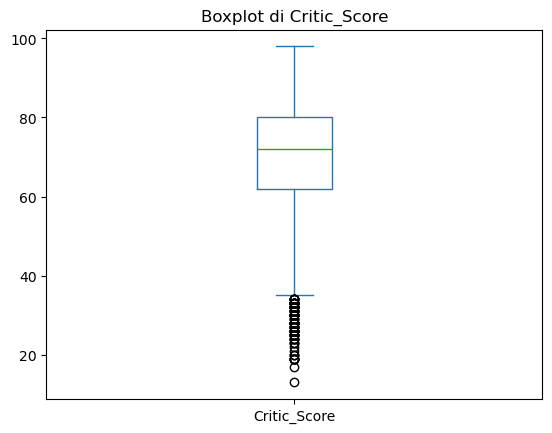

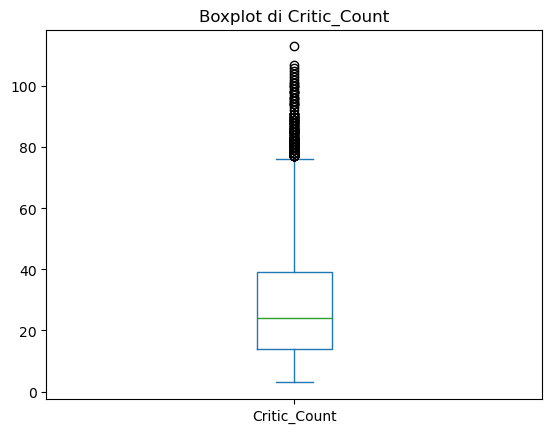

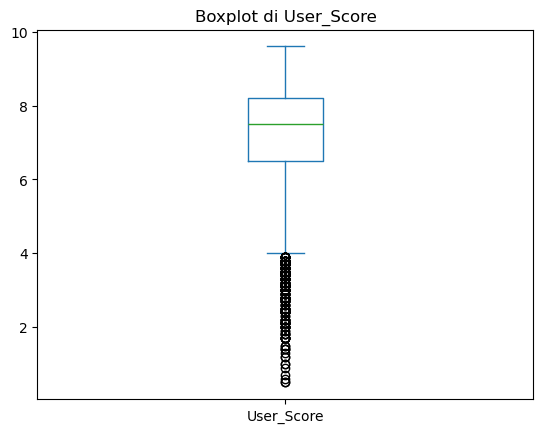

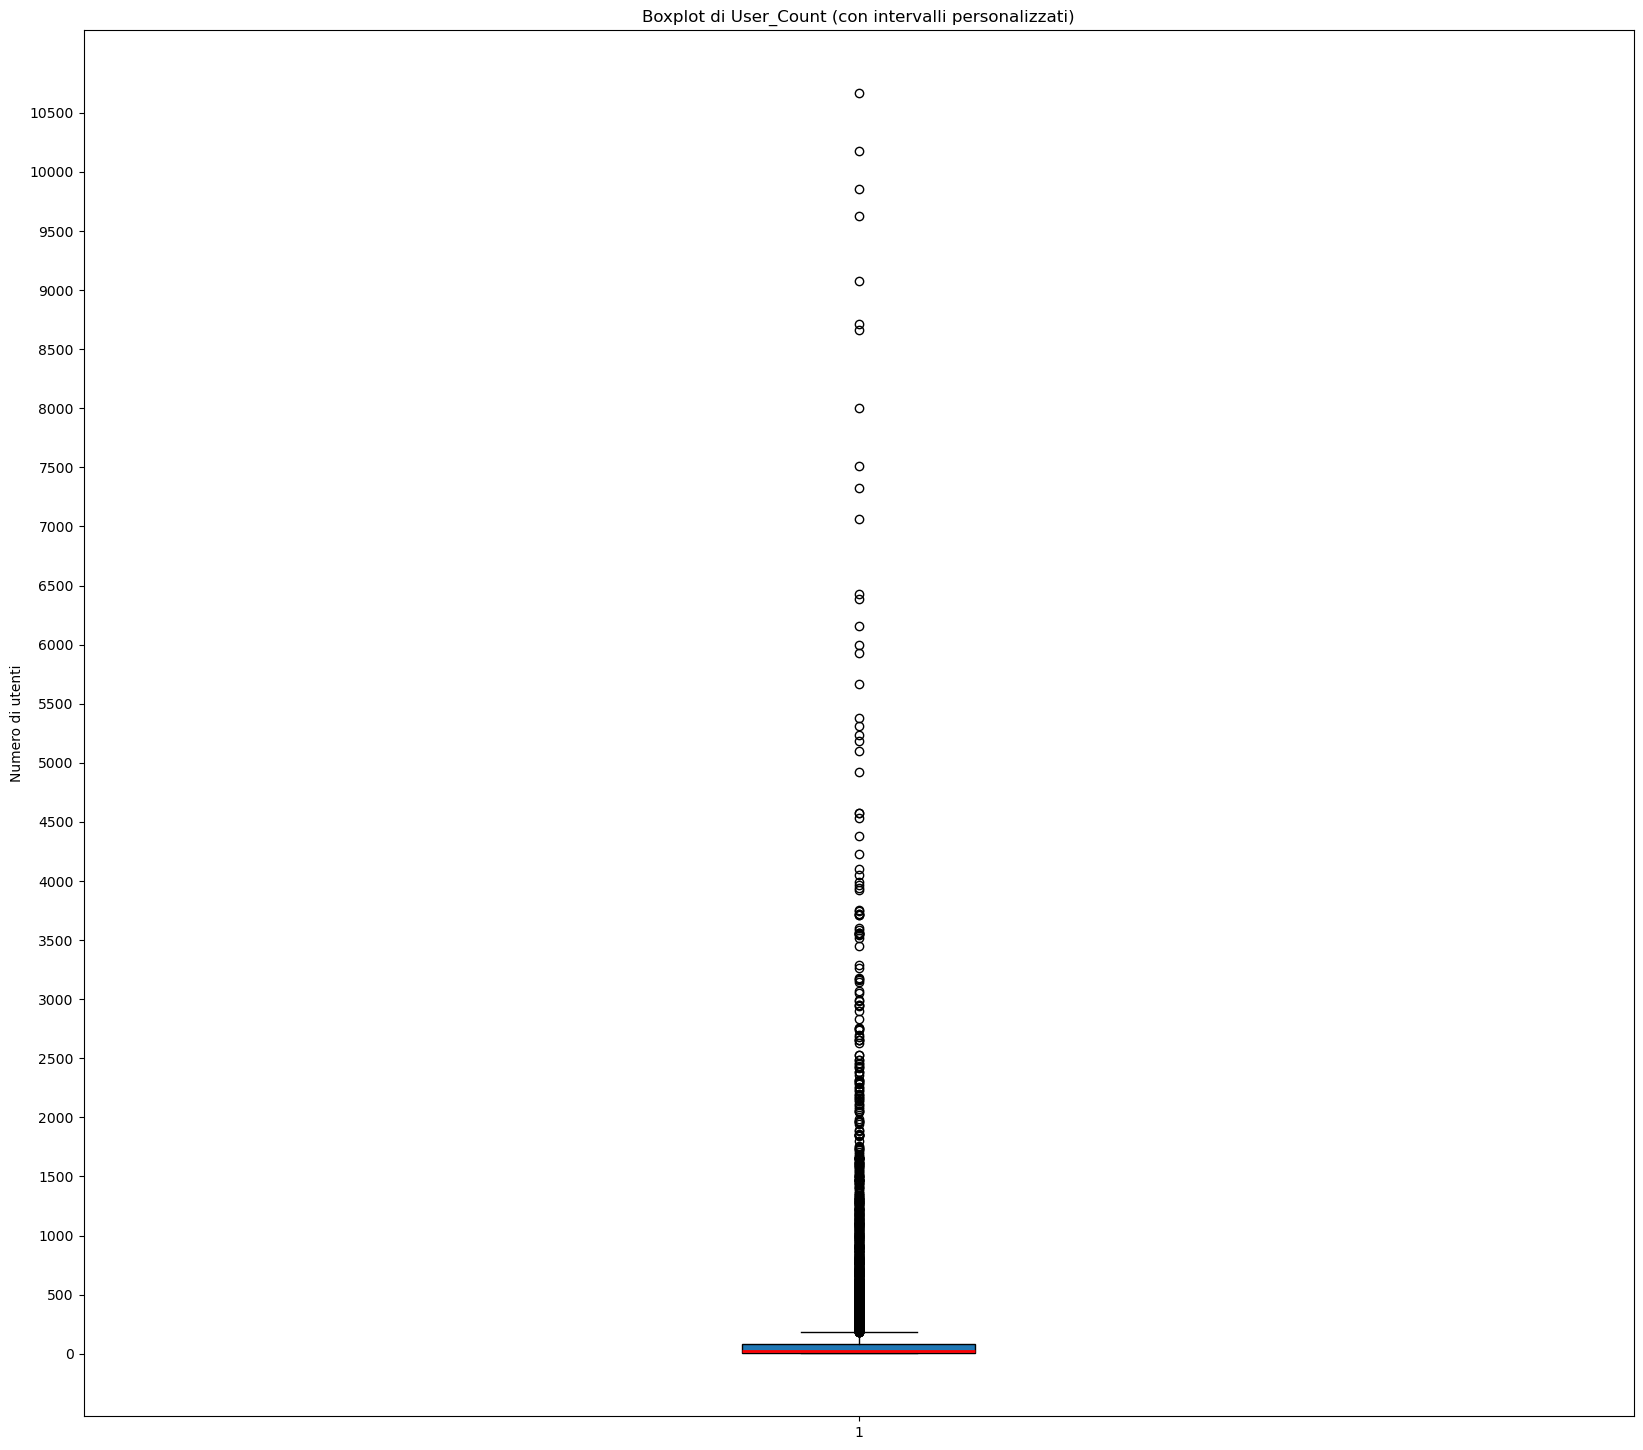

In [45]:
import matplotlib.pyplot as plt

# Filtra i dati escludendo i valori uguali a 0
columns_to_check = ['Critic_Score', 'Critic_Count', 'User_Score']
df_no_zeros = df[(df[columns_to_check] != 0).all(axis=1)]

# Boxplot separati per ogni colonna
columns = ['Critic_Score', 'Critic_Count', 'User_Score']

# Calcolo della mediana per le colonne filtrate
mediana_critic_score = df_no_zeros['Critic_Score'].median()
print(f"La mediana di Critic_Score è: {mediana_critic_score}")

mediana_critic_count = df_no_zeros['Critic_Count'].median()
print(f"La mediana di Critic_Count è: {mediana_critic_count}")

mediana_user_score = df_no_zeros['User_Score'].median()
print(f"La mediana di User_Score è: {mediana_user_score}")

mediana_user_count = df_no_zeros['User_Count'].median()
print(f"La mediana di User_Count è: {mediana_user_count}")

#Calcolo dei valori interquartili
user_count = df_no_zeros['User_Count'].dropna()
Q1 = np.percentile(user_count, 25)
Q3 = np.percentile(user_count, 75)
IQR = Q3 - Q1
#Stampa degli interquartili
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)




# Generazione dei boxplot
for column in columns:
    df_no_zeros[column].plot(kind='box', title=f"Boxplot di {column}")
    plt.show()


df_no_zeros = df[df['User_Count'] != 0]

# Creazione del boxplot per User_Count con intervalli numerici personalizzati
plt.figure(figsize=(20, 18))
boxplot = plt.boxplot(df_no_zeros['User_Count'], patch_artist=True, medianprops=dict(color="red", linewidth=2))
plt.title("Boxplot di User_Count (con intervalli personalizzati)")
plt.ylabel("Numero di utenti")

# Personalizzazione degli intervalli sull'asse y
max_value = df_no_zeros['User_Count'].max()
plt.yticks(range(0, int(max_value) + 1, 500))  # Intervalli di 500


plt.show()

# Barplot che visualizza e confronta il numero delle vendite dei giochi che sono state effettuate in Europa, Giappone, Nord America e altre regioni

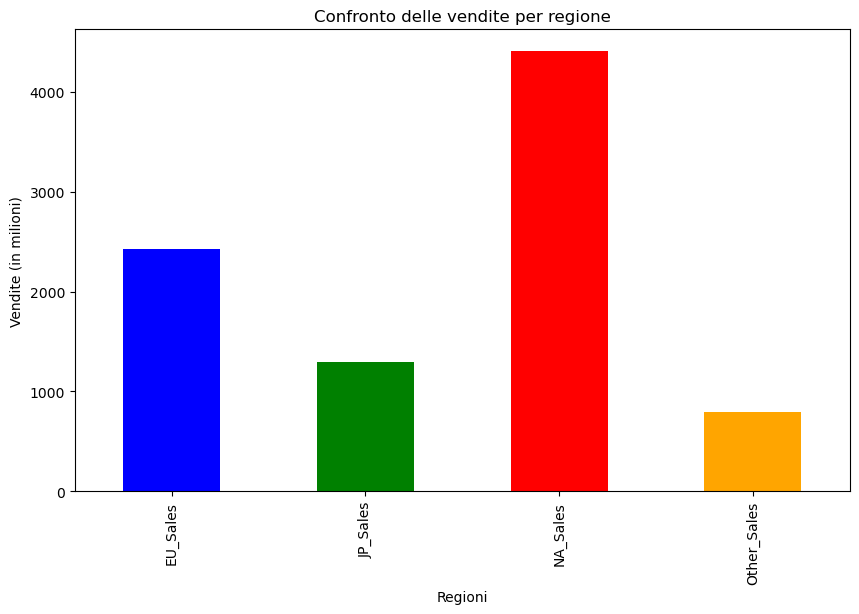

In [46]:
import matplotlib.pyplot as plt

# Calcola la somma delle vendite per ogni colonna
sales_sums = df[['EU_Sales', 'JP_Sales', 'NA_Sales', 'Other_Sales']].sum()

# Crea il barplot
sales_sums.plot(kind='bar', figsize=(10, 6), title='Confronto delle vendite per regione', color=['blue', 'green', 'red', 'orange'])
plt.ylabel('Vendite (in milioni)')
plt.xlabel('Regioni')
plt.show()